In [35]:
import pynbody
import cmasher
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# This tool to plot initial conditions grid si shipped with genetIC
import plotslice

%matplotlib inline
%load_ext autoreload
%autoreload 2
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rcParams.update({'font.family': 'Times New Roman'})
matplotlib.rcParams.update({'axes.labelweight' : 'bold'})
matplotlib.rcParams.update({'axes.labelsize' : '22'})
matplotlib.rcParams.update({'xtick.labelsize' : '22'})
matplotlib.rcParams.update({'ytick.labelsize' : '22'})
matplotlib.rcParams.update({'mathtext.default' : 'regular'})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Look into some of the properties of the ICs we created

In [36]:
s = pynbody.load("./zoom_ics/test.gadget3")
s.physical_units()

In [37]:
s.properties

{'omegaM0': 0.3158,
 'omegaL0': 0.6842,
 'boxsize': Unit("3.70e+02 kpc"),
 'a': 0.004975124378109453,
 'h': 0.6732,
 'time': Unit("6.18e-03 kpc s km**-1")}

In [38]:
s.properties['boxsize'].in_units("a Mpc", **s.conversion_context())

74.2721330956625

In [39]:
s.properties['z']

200.0

In [40]:
s.d['mass'].in_units("Msol")

SimArray([7.7576837e+09, 7.7576837e+09, 7.7576837e+09, ..., 2.4237642e+08,
          2.4237642e+08, 2.4237642e+08], dtype=float32, 'Msol')

In [41]:
s.d['mass'].in_units("Msol").min()

SimArray(2.4237642e+08, dtype=float32, 'Msol')

In [42]:
s.d['mass'].in_units("Msol").max()

SimArray(7.7576837e+09, dtype=float32, 'Msol')

# Make a quick image of the zoom region and the Lagrangian region

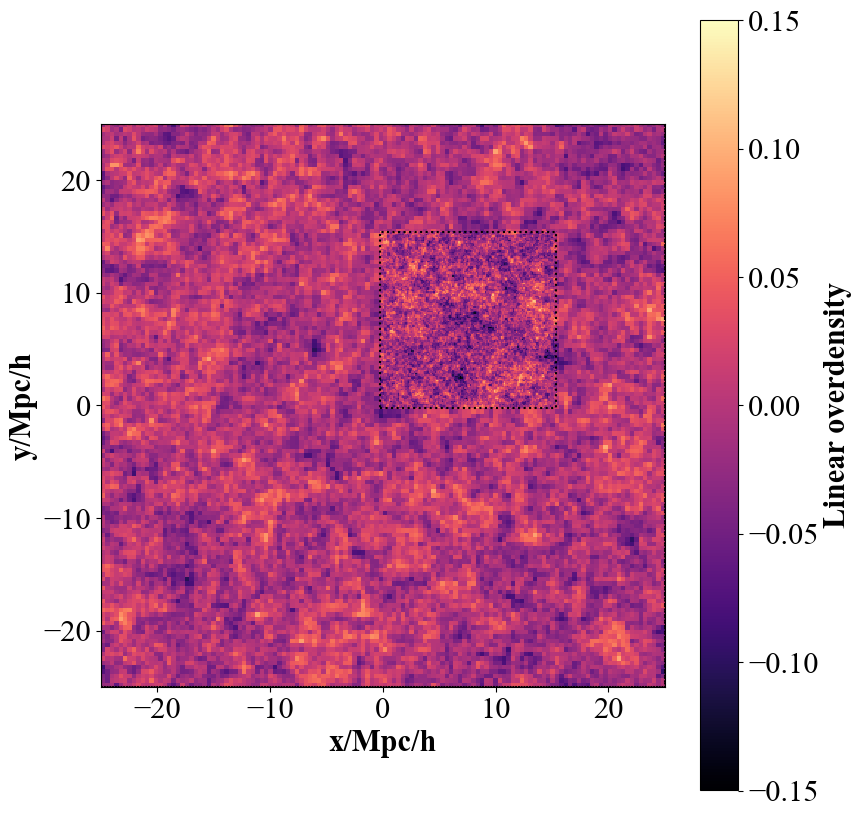

In [43]:
fig = plt.figure(figsize=(20, 10))

plt.set_cmap("magma")
plt.subplot(121)
plotslice.plotslice("./zoom_ics/", slice=32) # 32 is not random here, it is a z-coordinate about in the middle of the zoom region

plt.colorbar(ax=plt.gcf().axes).set_label("Linear overdensity")

SimArray([[1.15423232e+11, 1.15120538e+11, 1.14806112e+11, ...,
           1.15464651e+11, 1.15000607e+11, 1.14511143e+11],
          [1.14870608e+11, 1.14592670e+11, 1.14258280e+11, ...,
           1.14866520e+11, 1.14477466e+11, 1.14064835e+11],
          [1.14226512e+11, 1.13991746e+11, 1.13692295e+11, ...,
           1.14221629e+11, 1.13776968e+11, 1.13451999e+11],
          ...,
          [1.15110404e+11, 1.14840609e+11, 1.14494071e+11, ...,
           1.15526500e+11, 1.14939838e+11, 1.14381832e+11],
          [1.14879406e+11, 1.14626789e+11, 1.14171798e+11, ...,
           1.15141444e+11, 1.14562277e+11, 1.14080195e+11],
          [1.14632884e+11, 1.14378605e+11, 1.14049335e+11, ...,
           1.14679472e+11, 1.14230297e+11, 1.13795580e+11]], dtype=float32, 'Msol kpc**-2')

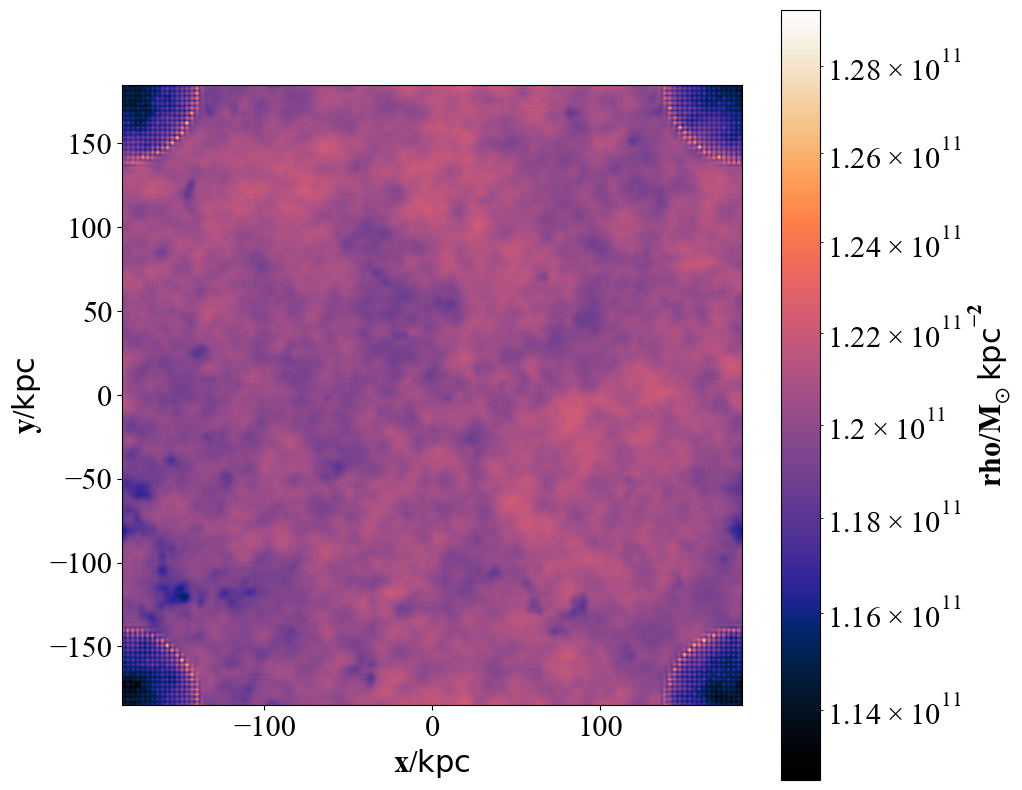

In [44]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
pynbody.plot.sph.image(s.d, qty='rho', width="50 a Mpc h**-1", 
                       cmap=cmasher.torch, units="Msol kpc**-2")

In [45]:
# Now center on the high-rez particles to visualize it better
pynbody.analysis.halo.center(s.d[s.d['mass'] < 1e9], vel=False)

SimArray([[7.8193638e+09, 7.8204826e+09, 7.8216028e+09, ...,
           7.8341130e+09, 7.8488069e+09, 7.8635008e+09],
          [7.8149202e+09, 7.8171648e+09, 7.8194084e+09, ...,
           7.8288860e+09, 7.8436685e+09, 7.8584504e+09],
          [7.8104760e+09, 7.8138450e+09, 7.8172134e+09, ...,
           7.8236580e+09, 7.8385285e+09, 7.8533996e+09],
          ...,
          [7.7301903e+09, 7.7349560e+09, 7.7397228e+09, ...,
           7.8249498e+09, 7.8315515e+09, 7.8381532e+09],
          [7.7366584e+09, 7.7417882e+09, 7.7469184e+09, ...,
           7.8282962e+09, 7.8348319e+09, 7.8413696e+09],
          [7.7431276e+09, 7.7486218e+09, 7.7541140e+09, ...,
           7.8316421e+09, 7.8381138e+09, 7.8445844e+09]], dtype=float32, 'Msol')

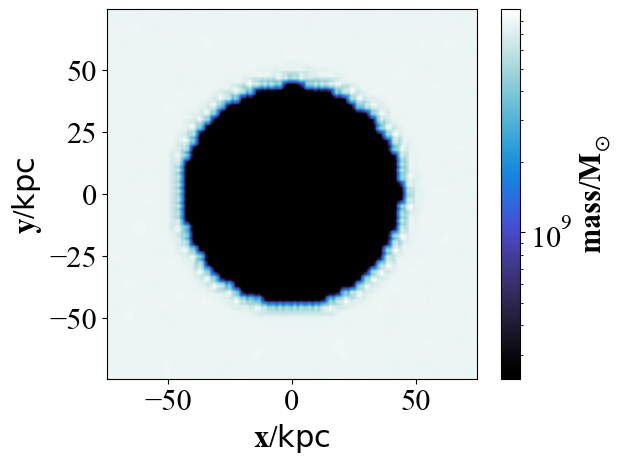

In [46]:
pynbody.plot.sph.image(s.d, qty='mass', width="30 a Mpc", cmap=cmasher.freeze, units="Msol")

SimArray([[1.19656522e+11, 1.19663665e+11, 1.19670784e+11, ...,
           1.19900021e+11, 1.19790911e+11, 1.19681835e+11],
          [1.19588545e+11, 1.19631069e+11, 1.19673618e+11, ...,
           1.19849009e+11, 1.19769326e+11, 1.19689626e+11],
          [1.19520559e+11, 1.19598490e+11, 1.19676428e+11, ...,
           1.19798022e+11, 1.19747731e+11, 1.19697441e+11],
          ...,
          [1.19979303e+11, 1.19920902e+11, 1.19862510e+11, ...,
           1.19622550e+11, 1.19781065e+11, 1.19939572e+11],
          [1.19865762e+11, 1.19816962e+11, 1.19768138e+11, ...,
           1.19831626e+11, 1.19854416e+11, 1.19877214e+11],
          [1.19752245e+11, 1.19713014e+11, 1.19673782e+11, ...,
           1.20040710e+11, 1.19927783e+11, 1.19814857e+11]], dtype=float32, 'Msol kpc**-2')

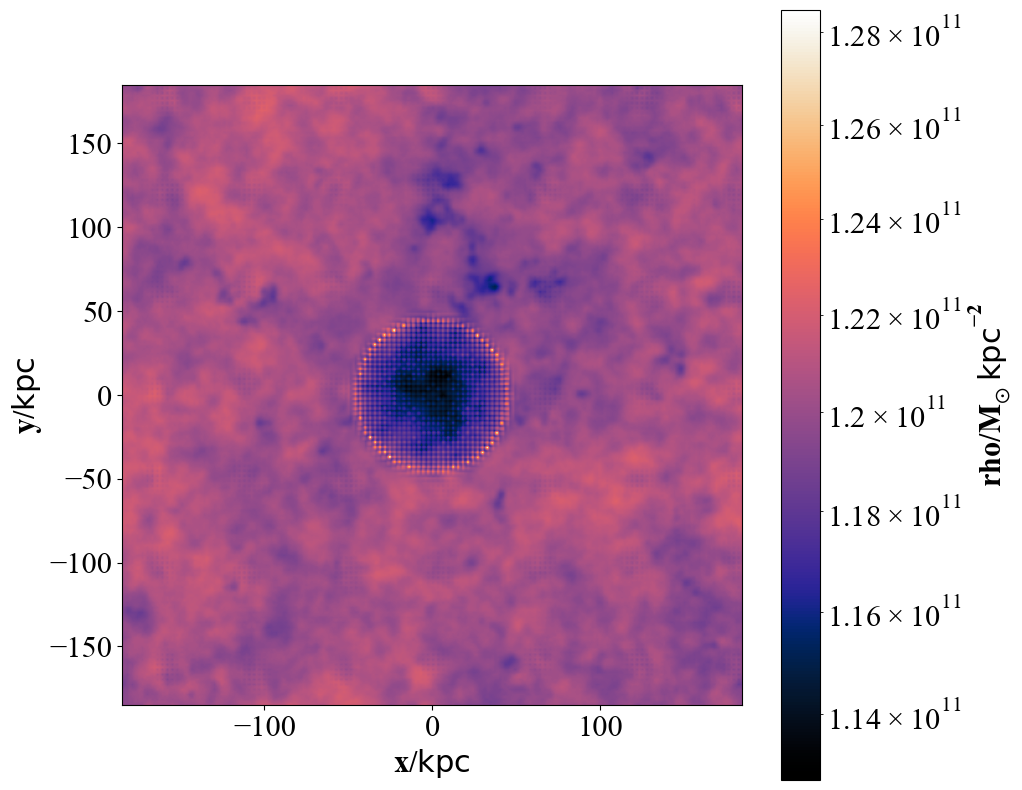

In [13]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
pynbody.plot.sph.image(s.d, qty='rho', width="50 a Mpc h**-1", 
                       cmap=cmasher.torch, units="Msol kpc**-2")

# Now load the genetically-modified version and compare

In [47]:
s = pynbody.load("./zoom_ics/test.gadget3")
s.physical_units()

sgm = pynbody.load("./gm_zoom_ics/test_gm.gadget3")
sgm.physical_units()

Text(0.5, 1.0, 'Modified')

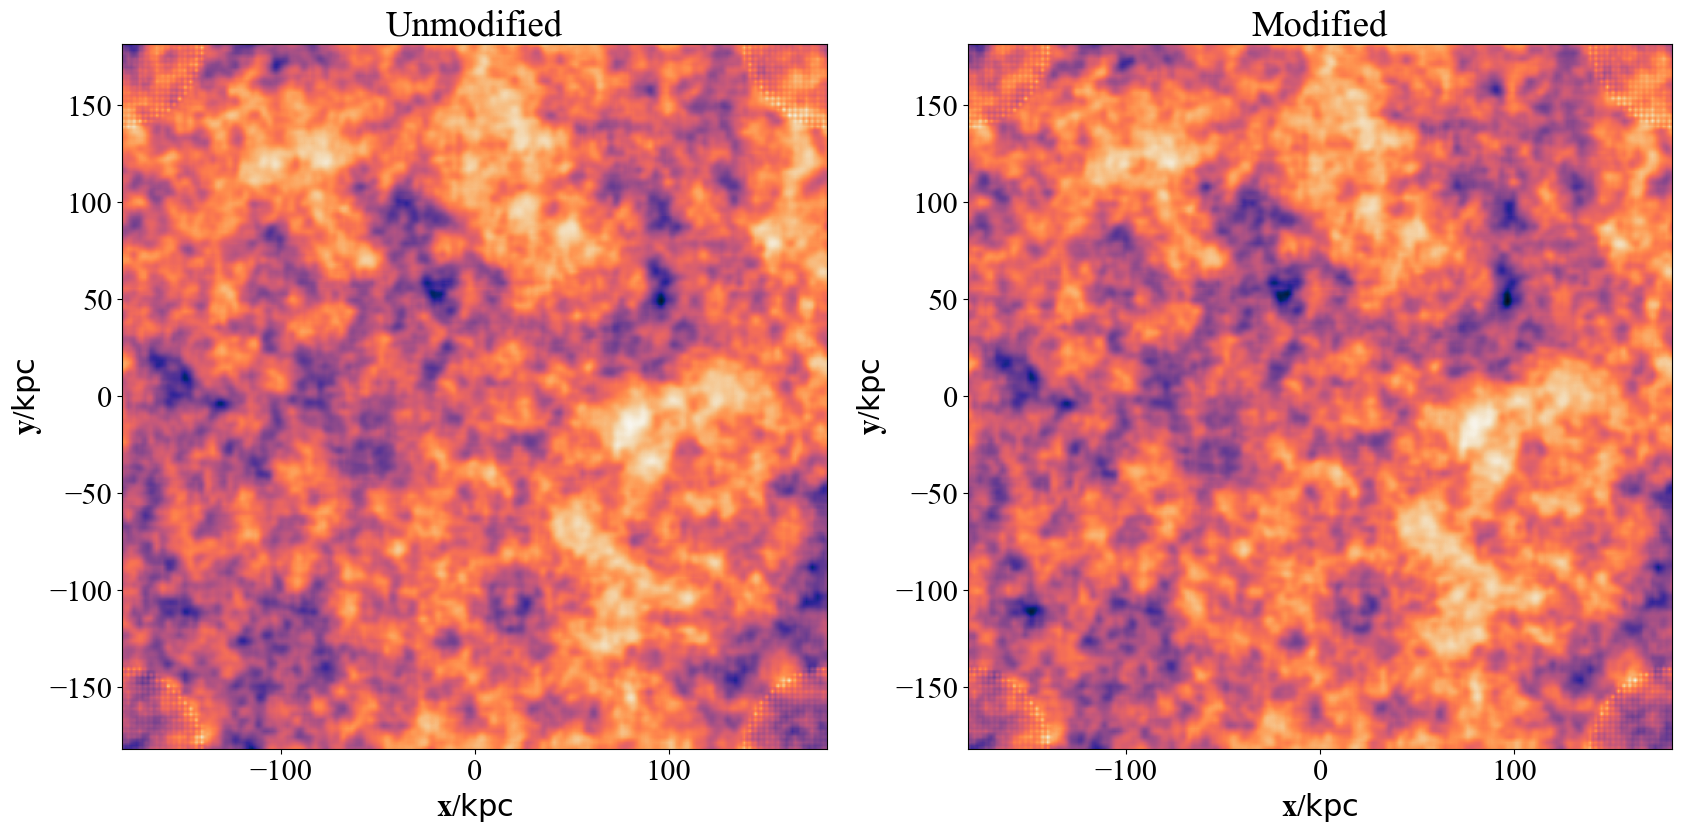

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

im1 = pynbody.plot.sph.image(s.d, qty='rho', width="73 a Mpc",
                       cmap=cmasher.torch, units="Msol kpc**-2",
                       vmin=7e10, vmax=1.2e11, subplot=ax1, show_cbar=False)

im2 = pynbody.plot.sph.image(sgm.d, qty='rho', width="73 a Mpc",
                       cmap=cmasher.torch, units="Msol kpc**-2",
                       vmin=7e10, vmax=1.2e11, subplot=ax2, show_cbar=False)

ax1.set_title("Unmodified")
ax2.set_title("Modified")

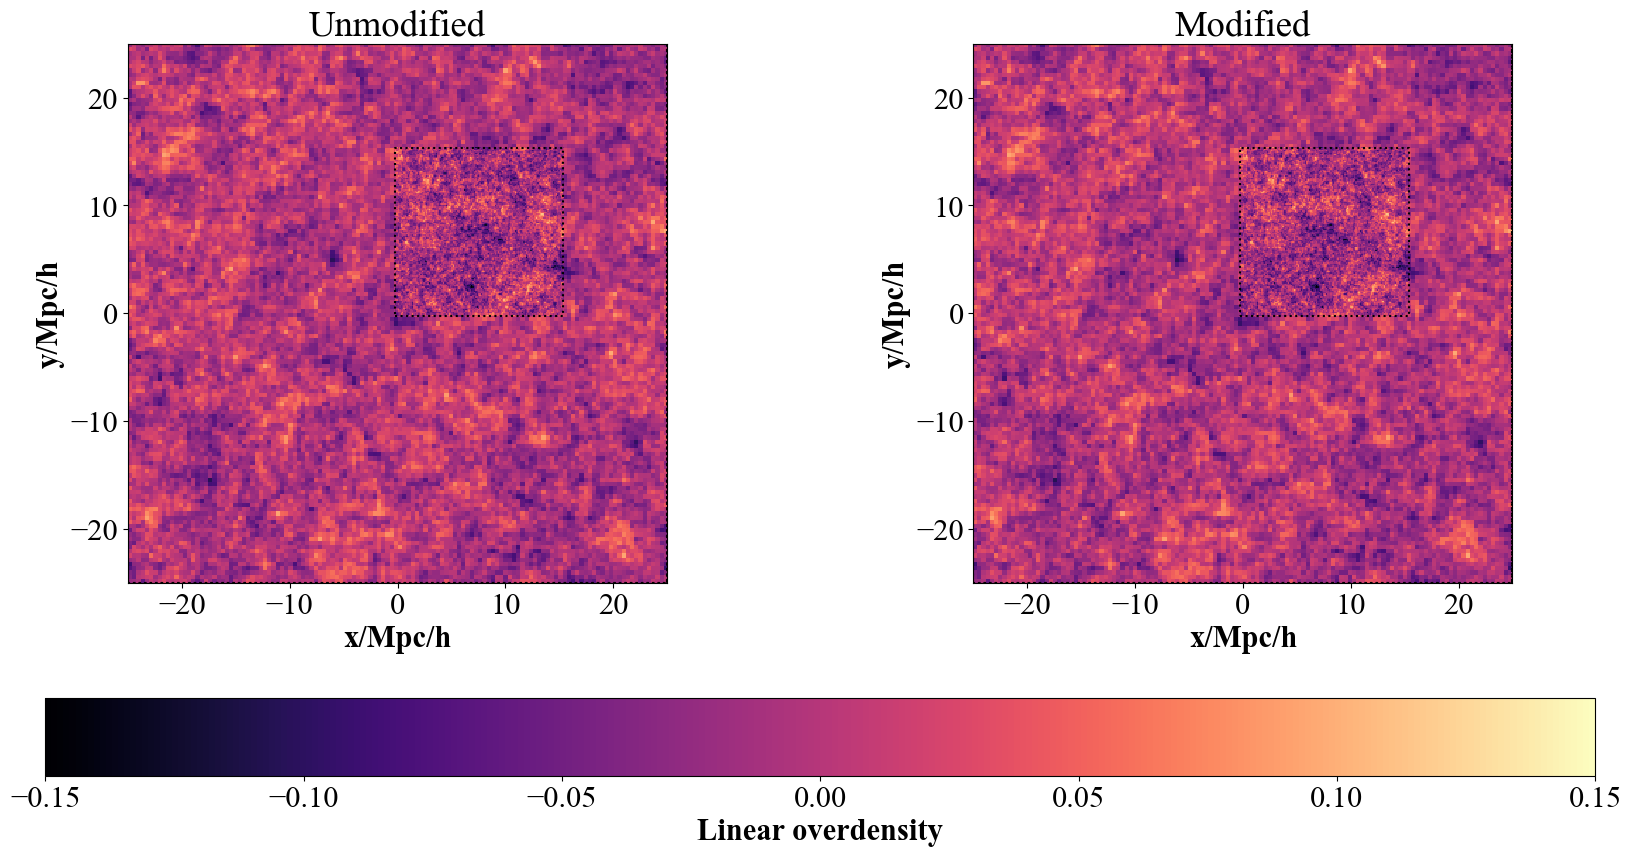

In [49]:
fig = plt.figure(figsize=(20, 10))

plt.set_cmap("magma")
plt.subplot(121)
plotslice.plotslice("./zoom_ics/", slice=32)
plt.title("Unmodified")

plt.subplot(122)
plotslice.plotslice("./gm_zoom_ics/", slice=32) 
plt.title("Modified")


plt.colorbar(ax=plt.gcf().axes,location='bottom').set_label("Linear overdensity")

# Very hard to tell the difference, this is somewhat the point -- genetic modifications maximally reproduce features between the unmodified and modified initial conditions. 

# But if we take a slice, and plot the difference...

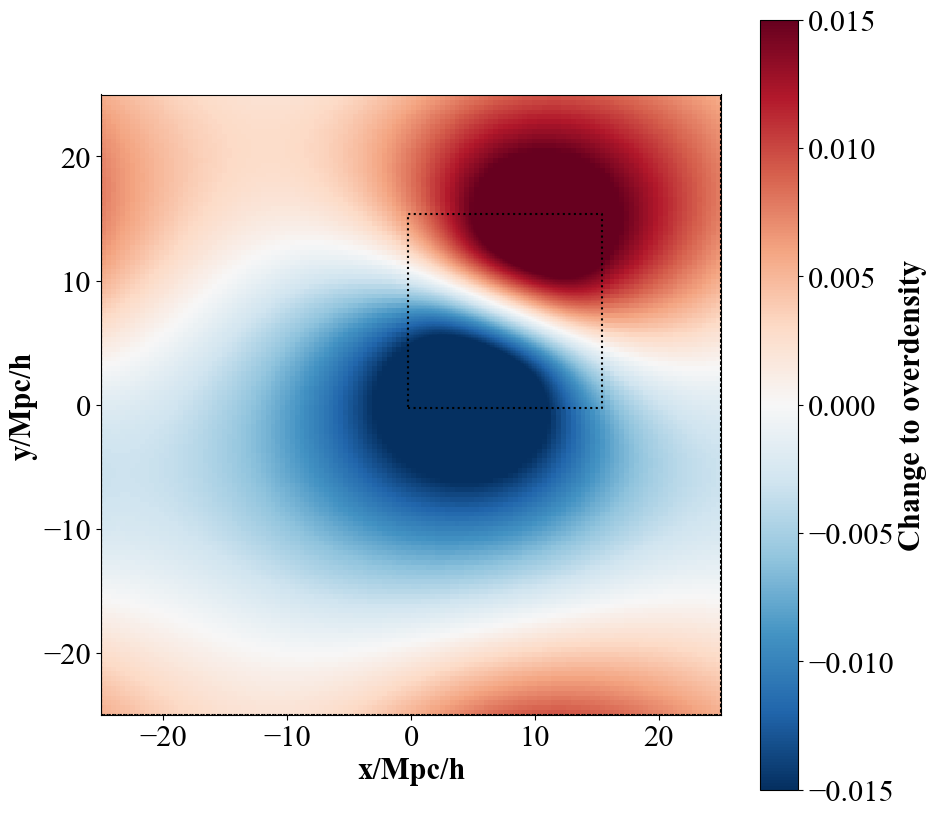

In [50]:
fig = plt.figure(figsize=(10, 10))

plt.set_cmap("RdBu_r")
plotslice.plotslice("gm_zoom_ics/", diff_prefix="zoom_ics/", slice=32, vmin=-0.015, vmax=0.015)
plt.colorbar().set_label(r"Change to overdensity")

In [51]:
highres_unmodified =s.d[s.d['mass'] < 1e9]
highres_modified = sgm.d[sgm.d['mass'] < 1e9]

pynbody.analysis.halo.center(highres_unmodified, vel=False)
pynbody.analysis.halo.center(highres_modified, vel=False)


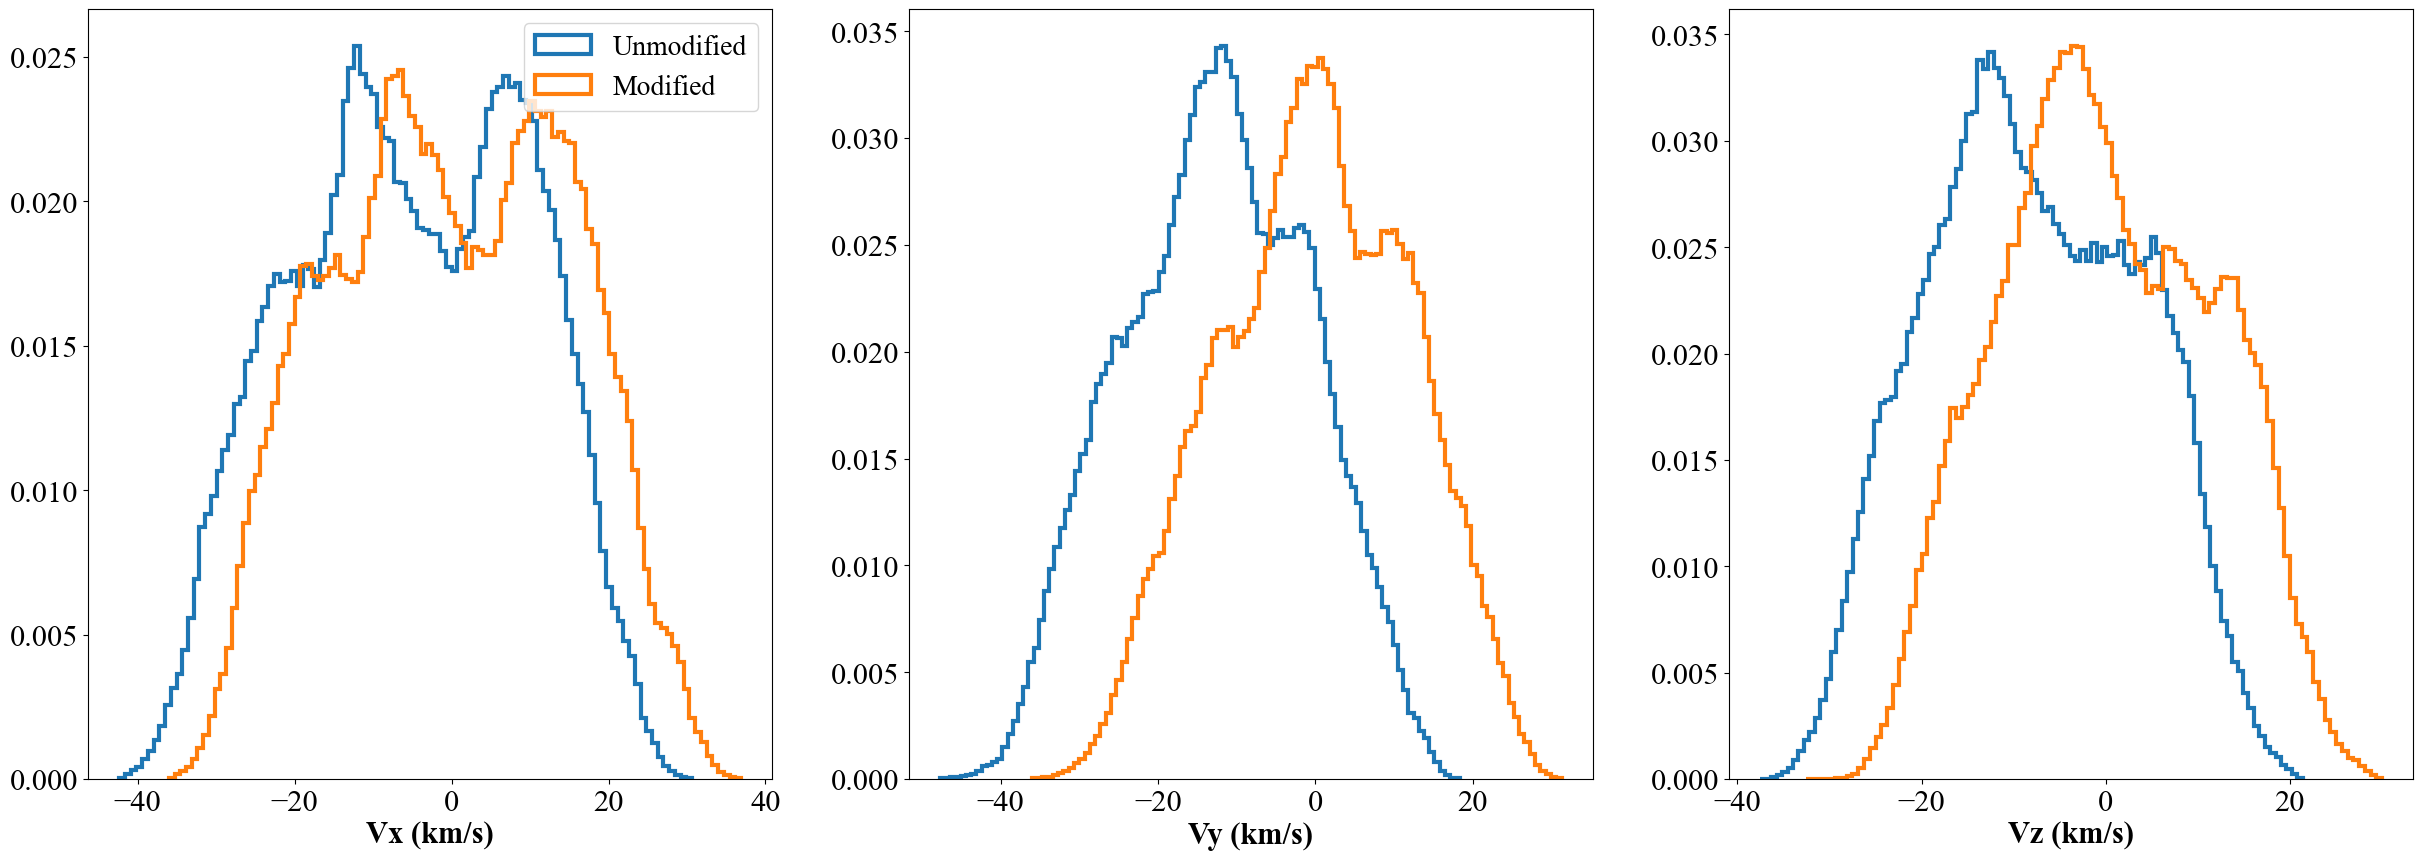

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(30, 10), nrows=1, ncols=3)
matplotlib.rcParams.update({'font.size': 20})

ax1.hist(highres_unmodified.d['vx'], bins=100, density=True, label="Unmodified",
         fill=False, linewidth=3, histtype='step')
ax2.hist(highres_unmodified.d['vy'], bins=100, density=True,
        fill=False, linewidth=3, histtype='step')
ax3.hist(highres_unmodified.d['vz'], bins=100, density=True,
        fill=False, linewidth=3, histtype='step')

ax1.hist(highres_modified.d['vx'], bins=100, density=True, label="Modified",
         fill=False, linewidth=3, histtype='step')
ax2.hist(highres_modified.d['vy'], bins=100, density=True,
        fill=False, linewidth=3, histtype='step')
ax3.hist(highres_modified.d['vz'], bins=100, density=True,
        fill=False, linewidth=3, histtype='step')

ax1.set_xlabel("Vx (km/s)")
ax2.set_xlabel("Vy (km/s)")
ax3.set_xlabel("Vz (km/s)")

ax1.legend()

In [53]:
print("Streaming velocity in x, y, z of the Lagrangian region in the unmodified case")
print(highres_unmodified.d['vel'].mean(axis=0))
print("\n")
print("Streaming mean velocity in x, y, z  of the Lagrangian region after modifications")
print(highres_modified.d['vel'].mean(axis=0))

Streaming velocity in x, y, z of the Lagrangian region in the unmodified case
[ -5.186459  -12.543606   -7.8391623]


Streaming mean velocity in x, y, z  of the Lagrangian region after modifications
[-0.00117808 -0.00900376  0.0018254 ]


# Things that one can play with using genetically-modified zoomed simulations

- Overdensity of the overall Lagrangian region -> Final halo mass of a galaxy (Roth et al. 2016)
- Overdensity of a subregion, at fixed overall density -> Merger mass ratio at fixed total mass (Pontzen et al. 2017, Rey et al. 2023)
- Overdensities of multiple structures of a given scale (variance) -> Multiple merger mass ratios at once (Rey and Pontzen 2018, Rey et al. 2019a)
- Overdensity of the main progenitor at z=2, at fixed overall density -> Formation time (Rey et al. 2019b)
- Velocity of the Lagrangian region -> Reduce advection and streaming errors (Pontzen et al. 2021)
- Angular momentum of the patch -> Disc formation (Cadiou et al. 2021a, 2022)
- Splicing a given region into a new environment -> Sampling different environments for the same halo (Cadiou et al. 2021b)

# Things to bear in mind with Ramses+genetIC

- Switch output format to `grafic`
- One has to compile Ramses with `LONGINT` to interact with genetIC
- One needs a fairly up-to-date master branch (2019) to properly read in particle files
- Ramses can be very buggy when using non-centered zoom, use the `centre_output` command to avoid
- genetIC will automatically output `ic_refmap` and `ic_pvar` files, set their values with the `pvar` command
- genetIC currently does not check for the continuity of the Lagrangian region, use `expand_flagged_regions`, `autopad` and `adapt_mask` if needed  